In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import re

In [31]:
data = pd.read_csv('Athletes_summer_games.csv')

olympics_data = data.drop(columns = ['Unnamed: 0', 'Name', 'Age', 'Team', 'Games', 'Season', 'City', 'Event'])
#olympics_data['country'] = olympics_data['Team'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
#print(list(olympics_data['Team'].unique()))
medal_mapping = {"Gold": 3, "Silver": 2, "Bronze": 1, "": 0}
olympics_data['Medal'] = olympics_data['Medal'].map(medal_mapping).fillna(0).astype(int)


In [32]:
label_encoders = {}
for column in ['Sport', 'NOC', 'Sex']:
    le = LabelEncoder()
    olympics_data[column] = le.fit_transform(olympics_data[column])
    label_encoders[column] = le

In [33]:
X = olympics_data[['Sport', 'NOC', 'Sex', 'Year']]
y = olympics_data['Medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest


In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     40192
           1       0.64      0.33      0.43      2460
           2       0.66      0.37      0.47      2383
           3       0.65      0.46      0.54      2500

    accuracy                           0.89     47535
   macro avg       0.72      0.53      0.60     47535
weighted avg       0.87      0.89      0.87     47535

0.8856211212790576


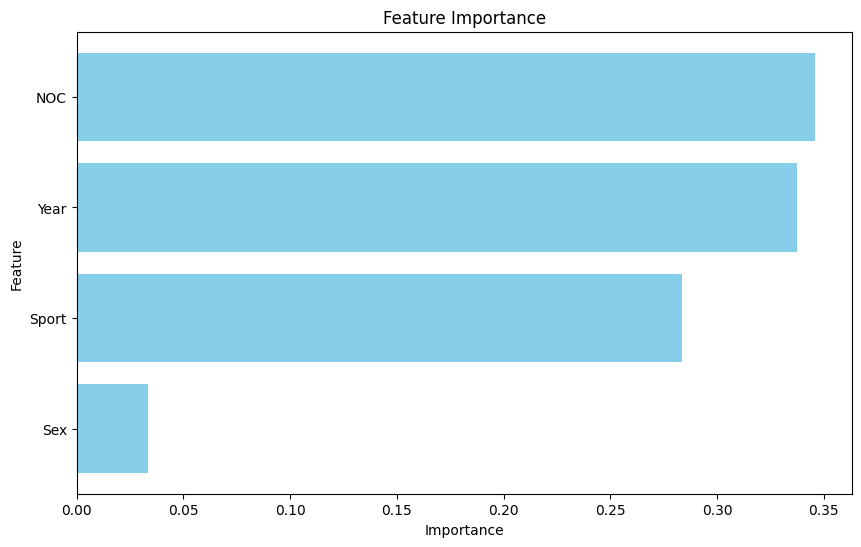

  Feature  Importance
0     NOC    0.345710
1    Year    0.337539
2   Sport    0.283353
3     Sex    0.033397


In [35]:
feature_importances = model.feature_importances_
df_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df_importances['Feature'], df_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

print(df_importances)

 Prediction Function

In [36]:
def predict_medal(sport, gender, country, year=2024):

    encoded_sport = label_encoders['Sport'].transform([sport])[0]
    encoded_gender = label_encoders['Sex'].transform([gender])[0]
    encoded_country = label_encoders['NOC'].transform([country])[0]
    #encoded_year = label_encoders['Year'].transform([year])[0]
    

    input_data = pd.DataFrame([[encoded_sport, encoded_country, encoded_gender, year]], 
                              columns=['Sport', 'NOC', 'Sex', 'Year'])
    
    predicted_medal = model.predict(input_data)[0]
    
    medal_reverse_mapping = {v: k for k, v in medal_mapping.items()}
    medal = medal_reverse_mapping[predicted_medal]
    
    if medal == "":
        return "No Medal"
    else:
        return medal

# User input prediction

In [40]:
def get_user_input_and_predict():
    sport = input("Enter the sport: ")
    gender = input("Enter the gender (M/F): ")
    country = input("Enter the country code: ")
    
    predicted_medal = predict_medal(sport, gender, country)
    print(f"The predicted medal for {country} in {sport} ({gender}) in 2024 is: {predicted_medal}")

get_user_input_and_predict()

Enter the sport: Basketball
Enter the gender (M/F): M
Enter the country code: USA
The predicted medal for USA in Basketball (M) in 2024 is: Gold
